In [30]:
import scanpy
import pandas
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'longitudinal_samples_healthy/'
data_sets = [f for f in os.listdir(path) if 'h5ad' in f]

In [3]:
data_sets

['IGTB1290_batch0.h5ad',
 'IGTB195_batch3.h5ad',
 'IGTB1921_batch1.h5ad',
 'IGTB514_batch2.h5ad',
 'IGTB826_batch3.h5ad',
 'IGTB469_batch1.h5ad',
 'IGTB1372_batch1.h5ad',
 'IGTB1921_batch0.h5ad',
 'IGTB195_batch1.h5ad',
 'IGTB508_batch1.h5ad',
 'IGTB469_batch4.h5ad',
 'IGTB1506_batch1.h5ad',
 'IGTB1506_batch4.h5ad',
 'IGTB514_batch1.h5ad',
 'IGTB826_batch1.h5ad',
 'IGTB1372_batch4.h5ad',
 'IGTB1290_batch2.h5ad',
 'IGTB256_batch1.h5ad',
 'IGTB256_batch0.h5ad',
 'IGTB508_batch3.h5ad']

In [12]:
cell_types_intersect = set()
cell_types_union = set()
gene_types_union = set()
gene_types_intersect = set()
for d in data_sets:
    if 'batch0' not in d:
        continue
    data = scanpy.read_h5ad(path+d)
    cell_types = [d.obs['ct_cov'][0] for d in data]
    cell_types_unique = set(cell_types)
    if len(cell_types_intersect) == 0:
        cell_types_intersect = cell_types_unique
        gene_types_intersect = set(data.to_df().columns)
    else:
        cell_types_intersect = cell_types_unique.intersection(cell_types_intersect)
        gene_types_intersect = gene_types_intersect.intersection(set(data.to_df().columns))
    cell_types_union = cell_types_unique.union(cell_types_union)
    gene_types_union = gene_types_union.union(set(data.to_df().columns))

18177
18177
18177
18177
18177
18177


/tmp/ipykernel_6718/475794535.py:7: RuntimeWarning: All-NaN slice encountered
  plt.plot(np.log2(np.nanmax(expression, axis=0)))


NK2: 46
B plasma: 6
cM: 840
cDC: 70
T8 memory effector cyto2: 172
T4 memory: 378
NK3: 17
T8 memory effector cyto1: 66
B naive: 446
T4 IFN: 8
ncM: 108
B memory: 224
pDC: 46
T4 naive: 954
T8 memory: 108
T8 memory effector cyto3: 118
T8 naive: 294
T4 regulatory: 116
Progenitor: 43
MK contam: 216
Prolif T: 16
NK1: 162
----------------


/tmp/ipykernel_6718/475794535.py:7: RuntimeWarning: All-NaN slice encountered
  plt.plot(np.log2(np.nanmax(expression, axis=0)))


NK2: 48
B plasma: 2
cM: 1232
cDC: 76
T8 memory effector cyto2: 187
T4 memory: 316
NK3: 9
T8 memory effector cyto1: 42
B naive: 204
T4 IFN: 16
ncM: 289
B memory: 331
pDC: 79
T4 naive: 1626
T8 memory: 124
T8 memory effector cyto3: 158
T8 naive: 263
T4 regulatory: 114
Progenitor: 112
MK contam: 188
Prolif T: 29
NK1: 310
----------------


/tmp/ipykernel_6718/475794535.py:7: RuntimeWarning: All-NaN slice encountered
  plt.plot(np.log2(np.nanmax(expression, axis=0)))


NK2: 101
B plasma: 1
cM: 704
cDC: 97
T8 memory effector cyto2: 120
T4 memory: 350
NK3: 9
T8 memory effector cyto1: 104
B naive: 583
T4 IFN: 14
ncM: 210
B memory: 214
pDC: 61
T4 naive: 1127
T8 memory: 140
T8 memory effector cyto3: 147
T8 naive: 565
T4 regulatory: 111
Progenitor: 74
MK contam: 244
Prolif T: 19
NK1: 285
----------------


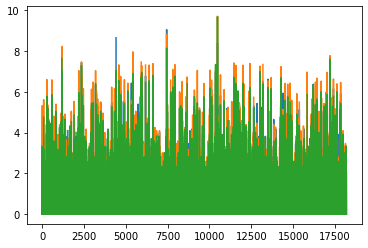

In [54]:
for d in data_sets:
    if 'batch0' not in d:
        continue
    data = scanpy.read_h5ad(path+d)
    expression = data.to_df().to_numpy()
    expression[expression == 0.0] = np.nan
    plt.plot(np.log2(np.nanmax(expression, axis=0)))
    for cell_type in cell_types_intersect:
        mask = data.obs['ct_cov'] == cell_type
        cells = data[mask]
        print(cell_type + ': ' + str(len(cells)))
        mean_expression = cells.to_df().mean()
#         plt.plot(mean_expression)
#         plt.show()
    print('----------------')
    

In [51]:
len(gene_types_intersect)

18177

In [11]:
data_df = data.to_df()
gene_names = [dc for dc in data_df.columns]
print(gene_names)

['RP11-34P13.7', 'AL627309.1', 'AP006222.2', 'RP4-669L17.10', 'RP11-206L10.3', 'RP11-206L10.2', 'RP11-206L10.9', 'FAM87B', 'LINC00115', 'FAM41C', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4', 'ISG15', 'AGRN', 'C1orf159', 'RP11-465B22.5', 'TTLL10', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'FAM132A', 'RP5-902P8.12', 'UBE2J2', 'RP5-902P8.10', 'SCNN1D', 'ACAP3', 'PUSL1', 'CPSF3L', 'GLTPD1', 'TAS1R3', 'DVL1', 'MXRA8', 'AURKAIP1', 'CCNL2', 'RP4-758J18.2', 'MRPL20', 'RP4-758J18.13', 'ANKRD65', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'SSU72', 'AL645728.1', 'C1orf233', 'RP11-345P4.9', 'MIB2', 'MMP23B', 'CDK11B', 'RP11-345P4.10', 'SLC35E2B', 'RP11-345P4.7', 'CDK11A', 'SLC35E2', 'NADK', 'GNB1', 'RP1-140A9.1', 'TMEM52', 'C1orf222', 'PRKCZ', 'RP5-892K4.1', 'RP11-181G12.2', 'C1orf86', 'AL590822.2', 'AL590822.1', 'SKI', 'MORN1', 'RER1', 'PEX10', 'PLCH2', 'PANK4', 'RP3-395M20.12', 'TNFRSF14', 'RP3-395M20.9', 'FAM213B', 'MMEL1', 'TTC34', 'PRDM16', 'MEGF6', 'RP11-46F15.2', 'TPRG1L', 'WRAP73', 'TP73', 'TP

In [50]:
cell_types = [d.obs['ct_cov'][0] for d in data]

In [51]:
cell_types_unique = set(cell_types)

In [52]:
cell_types_unique

{'B atypical',
 'B memory',
 'B naive',
 'B plasma',
 'MK contam',
 'NK1',
 'NK2',
 'NK3',
 'Progenitor',
 'Prolif T',
 'T4 IFN',
 'T4 memory',
 'T4 naive',
 'T4 regulatory',
 'T8 central memory',
 'T8 memory',
 'T8 memory effector cyto1',
 'T8 memory effector cyto2',
 'T8 memory effector cyto3',
 'T8 naive',
 'cDC',
 'cM',
 'ncM',
 'pDC'}